In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
DataFile=pd.read_csv("/content/drive/MyDrive/DoAnMayHoc/UIT-ViNames/UIT-ViNames - Full.csv")

In [ ]:
print(DataFile)
print('Giới tính nam',int(DataFile[DataFile.Gender==1].size/2))
print('Giới tính nữ',int(DataFile[DataFile.Gender==0].size/2))
print('Điểm dữ liệu',len(DataFile))
print('giá trị Null', DataFile.isnull().sum())

                  Full_Name  Gender
0             Ngô Xuân Tùng       1
1         Bùi Dương Thảo Vy       0
2               Lưu Thế Huy       1
3            Nguyễn Thị Vân       0
4           Dương Minh Long       1
...                     ...     ...
26846      Đoàn Thị Bảo Thu       0
26847            Ôn Hoa Thu       1
26848  Nguyễn Thị Huỳnh Như       0
26849  Nguyễn Thị Hồng Phúc       0
26850         Dương Mỹ Uyên       0

[26851 rows x 2 columns]
Giới tính nam 15495
Giới tính nữ 11356
Điểm dữ liệu 26851
giá trị Null Full_Name    0
Gender       0
dtype: int64


In [ ]:
DataFile.describe()

,Gender
count,26851.000000
mean,0.577073
std,0.494033
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
File_Train=pd.read_csv("/content/drive/MyDrive/DoAnMayHoc/UIT-ViNames/UIT-ViNames - Train.csv")
File_Test=pd.read_csv("/content/drive/MyDrive/DoAnMayHoc/UIT-ViNames/UIT-ViNames-Test.csv")
File_Dev= pd.read_csv("/content/drive/MyDrive/DoAnMayHoc/UIT-ViNames/UIT-ViNames - Dev.csv")

In [ ]:
print(len(File_Train)/len(DataFile))
print(len(File_Test)/len(DataFile))
print(len(File_Dev)/len(DataFile))

0.699973930207441
0.19999255148784031
0.10003351830471863


# Phân chia dữ liệu

In [ ]:
def Split_File(file):
  i =0
  file["First_Name"]=file["Mid_Name"]=file["Last_Name"]=file.Full_Name
  for FULL_NAME in file.Full_Name:
    Name=FULL_NAME
    Name_Split= Name.split()
    file.First_Name[i]=Name_Split[0]
    file.Mid_Name[i]=str(Name_Split[1:-1])
    file.Last_Name[i]=Name_Split[-1]
    i=i+1


In [ ]:
Split_File(DataFile)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
DataFile

,Full_Name,Gender,First_Name,Mid_Name,Last_Name
0,Ngô Xuân Tùng,1,Ngô,['Xuân'],Tùng
1,Bùi Dương Thảo Vy,0,Bùi,"['Dương', 'Thảo']",Vy
2,Lưu Thế Huy,1,Lưu,['Thế'],Huy
3,Nguyễn Thị Vân,0,Nguyễn,['Thị'],Vân
4,Dương Minh Long,1,Dương,['Minh'],Long
...,...,...,...,...,...
26846,Đoàn Thị Bảo Thu,0,Đoàn,"['Thị', 'Bảo']",Thu
26847,Ôn Hoa Thu,1,Ôn,['Hoa'],Thu
26848,Nguyễn Thị Huỳnh Như,0,Nguyễn,"['Thị', 'Huỳnh']",Như
26849,Nguyễn Thị Hồng Phúc,0,Nguyễn,"['Thị', 'Hồng']",Phúc


In [ ]:
i =0
for x in DataFile.First_Name:
  if str(x)=="Nguyễn" or str(x)=="nguyễn":
    i+=1
print(i)


8517


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
X_train = cv.fit_transform(File_Train.Full_Names)
y_train = File_Train.Gender
X_test = cv.transform(File_Test.Full_Names)
y_test = File_Test.Gender

In [ ]:
# hiển thị một số thông tin về dữ liệu 
print("Dữ liệu training = ", X_train.shape, y_train.shape)
print("Dữ liệu testing = ", X_test.shape, y_test.shape)

Dữ liệu training =  (18795, 1292) (18795,)
Dữ liệu testing =  (5370, 1292) (5370,)


#hàm liên quan

In [ ]:
def Out_CSV(Model,Name_out):# xuất file CSV những kết quả sai của mô hình, đầu vào là kết quả của mô hình sau khi dự đoán, tên file out.
  writer = csv.writer(open("/content/drive/MyDrive/DoAnMayHoc/"+str(Name_out)+".csv", 'w'))
  writer.writerow(["Full_Names","Gender_Predicted","Gender_True"])
  i=0
  for x in Model:
    if (x != File_Test.Gender[i]):
      writer.writerow([File_Test.Full_Names[i],x,File_Test.Gender[i]])
      #arr_true.append([File_Test.Attr[i],x,File_CSV.Gender[i]])
    i+=1

In [ ]:
def gender_trans(Model,name): # Dự đoán
    Name = [name]
    vector = cv.transform(Name).toarray()
    if Model.predict(vector) == 1:
        print("Giới Tính: Nam")
    else:
        print("Giới Tính: Nữ")

#Mô hình NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
print("- Training ...")
clf = MultinomialNB()
clf.fit(X_train,y_train)
print("- model - train complete")

- Training ...
- model - train complete


In [ ]:
print("- Test ...")
clf.score(X_test,y_test)
Pre_clf=clf.predict(X_test)

- Test ...


In [ ]:
Out_CSV(Pre_clf,"outNB")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy: " + str(accuracy_score(y_test, Pre_clf)))
print("Precision: " + str(precision_score(y_test, Pre_clf)))
print("Recall: " + str(recall_score(y_test, Pre_clf)))
print("F1-micro: " + str(f1_score(y_test, Pre_clf)))
print("F1-macro: " + str(f1_score(y_test, Pre_clf, average='macro')))
cf = confusion_matrix(y_test, Pre_clf)


Accuracy: 0.9493482309124768
Precision: 0.9558584875040571
Recall: 0.9558584875040571
F1-micro: 0.9558584875040571
F1-macro: 0.948221947989687


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Pre_clf)) 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2289
           1       0.96      0.96      0.96      3081

    accuracy                           0.95      5370
   macro avg       0.95      0.95      0.95      5370
weighted avg       0.95      0.95      0.95      5370



In [ ]:
from sklearn.metrics import confusion_matrix

matrix_clf = confusion_matrix(y_test, Pre_clf)

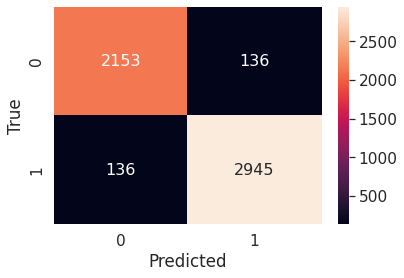

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(font_scale=1.4) 
sn.heatmap(matrix_clf, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
gender_trans(clf,"H'Hen Niê")

Giới Tính: Nữ


# Mô hình SVM và GridSearchCV


In [ ]:
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
X_train_SVM = cv.fit_transform(File_Train.Full_Names)
y_train_SVM = File_Train.Gender
X_test_SVM = cv.transform(File_Test.Full_Names)
y_test_SVM = File_Test.Gender

In [ ]:
# hiển thị một số thông tin về dữ liệu 
print("Dữ liệu training = ", X_train_SVM.shape, y_train_SVM.shape)
print("Dữ liệu testing = ", X_test_SVM.shape, y_test_SVM.shape)

Dữ liệu training =  (18795, 1292) (18795,)
Dữ liệu testing =  (5370, 1292) (5370,)


In [ ]:
print("- Training ...")
# X_train.shape
print("- Train size = {}".format(X_train_SVM.shape))
module = svm.SVC(C=10, gamma=1, kernel='linear')
module.fit(X_train_SVM, y_train_SVM)
print("- model - train complete")

- Training ...
- Train size = (18795, 1292)
- model - train complete


In [ ]:
y_pred = module.predict(X_test_SVM)
Pre_svm=module.predict(X_test_SVM)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: " + str(accuracy_score(y_test_SVM, Pre_clf)))
print("Precision: " + str(precision_score(y_test_SVM, Pre_clf)))
print("Recall: " + str(recall_score(y_test_SVM, Pre_clf)))
print("F1-micro: " + str(f1_score(y_test_SVM, Pre_clf)))
print("F1-macro: " + str(f1_score(y_test_SVM, Pre_clf, average='macro')))
cf = confusion_matrix(y_test_SVM, Pre_clf)

Accuracy: 0.9493482309124768
Precision: 0.9558584875040571
Recall: 0.9558584875040571
F1-micro: 0.9558584875040571
F1-macro: 0.948221947989687


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_SVM, Pre_svm)) 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2289
           1       0.95      0.97      0.96      3081

    accuracy                           0.95      5370
   macro avg       0.95      0.95      0.95      5370
weighted avg       0.95      0.95      0.95      5370



In [ ]:
from sklearn.metrics import confusion_matrix

matrix_svm = confusion_matrix(y_test_SVM, Pre_svm)

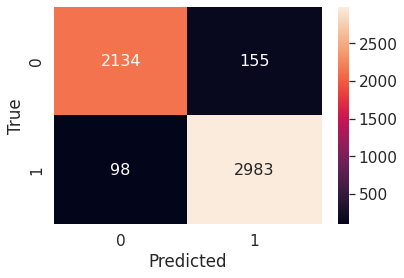

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(font_scale=1.4) 
sn.heatmap(matrix_svm, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV # link tham khảo:https://cafedev.vn/tu-hoc-ml-dieu-chinh-sieu-tham-so-svm-bang-gridsearchcv-ml/
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_SVM, y_train_SVM) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.904 total time=   2.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.899 total time=   2.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   2.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.904 total time=   2.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.899 total time=   2.2s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.904 total time=   2.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.899 total time=   2.1s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.900 total time=   2.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.904 total time=   2.2s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.899 total time=   2.1s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.904 total time=   2.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
predictions = grid.predict(X_test_SVM) 
print(classification_report(y_test_SVM, predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2289
           1       0.95      0.97      0.96      3081

    accuracy                           0.95      5370
   macro avg       0.95      0.95      0.95      5370
weighted avg       0.95      0.95      0.95      5370



In [ ]:
print("Thông số tốt nhất:",grid.best_params_) 
print("Công cụ ướng tính tốt nhất:",grid.best_estimator_) 

Thông số tốt nhất: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Công cụ ướng tính tốt nhất: SVC(C=10, gamma=1, kernel='linear')


In [ ]:
def Out_CSV(Module,File_CSV): # mô hình,file csv cần xuất: Hàm xuất đúng  chỉ cần đổi tên file trong đg dẫn và phép so sánh => file CSV sai
  writer = csv.writer(open("/content/drive/MyDrive/DoAnMayHoc/file_out_SVM.csv", 'w'))
  writer.writerow(["Full_Names","Gender_Predicted","Gender_True"])
  i=0
  for x in Module:
    if (x != File_CSV.Gender[i]):
      writer.writerow([File_CSV.Full_Names[i],x,File_CSV.Gender[i]])
      #arr_true.append([File_Test.Attr[i],x,File_CSV.Gender[i]])
    i+=1

In [ ]:
Out_CSV(Pre_svm,File_Test)

In [ ]:
def gender_trans_svm(name):
    Name = [name]
    vector = cv.transform(Name).toarray()
    if module.predict(vector) == 1:
        print("Giới Tính:Nam")
    else:
        print("Giới Tính:Nữ")

In [ ]:
gender_trans_svm("Ksor H’Bơ Khăp")

Giới Tính:Nữ


# Mô hình Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
print(File_Train.columns)

Index(['Full_Names', 'Gender'], dtype='object')


In [ ]:
File_Train.sample(5)

,Full_Names,Gender
3005,Nguyễn Phương Phi,1
9775,Lê Dương Hoàng Ngân,0
17511,Trần Vĩnh Thành,1
533,Nguyễn Đăng Tuấn Dũng,1
2474,Nguyễn Thị Thu Hằng,0


In [ ]:
cv = CountVectorizer()
X_train_lg = cv.fit_transform(File_Train.Full_Names)
y_train_lg = File_Train.Gender
X_test_lg = cv.transform(File_Test.Full_Names)
y_test_lg = File_Test.Gender

In [ ]:
print("Dữ liệu training = ", X_train_lg.shape, y_train_lg.shape)
print("Dữ liệu testing = ", X_test_lg.shape, y_test_lg.shape)

Dữ liệu training =  (18795, 1292) (18795,)
Dữ liệu testing =  (5370, 1292) (5370,)


In [ ]:
model1 = LogisticRegression(C= 1.5103373646043785,penalty= 'l2')
model1.fit(X_train_lg, y_train_lg)

LogisticRegression(C=1.5103373646043785)

In [ ]:
y_pred1 = model1.predict(X_test_lg)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: " + str(accuracy_score(y_test_lg, y_pred1)))
print("Precision: " + str(precision_score(y_test_lg,y_pred1)))
print("Recall: " + str(recall_score(y_test_lg, y_pred1)))
print("F1-micro: " + str(f1_score(y_test_lg, y_pred1)))
print("F1-macro: " + str(f1_score(y_test_lg, y_pred1, average='macro')))
cf = confusion_matrix(y_test_lg, y_pred1)

Accuracy: 0.9553072625698324
Precision: 0.9516693163751987
Recall: 0.9714378448555664
F1-micro: 0.9614519755862513
F1-macro: 0.9541420267829351


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_lg, y_pred1)) 

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2289
           1       0.95      0.97      0.96      3081

    accuracy                           0.96      5370
   macro avg       0.96      0.95      0.95      5370
weighted avg       0.96      0.96      0.96      5370



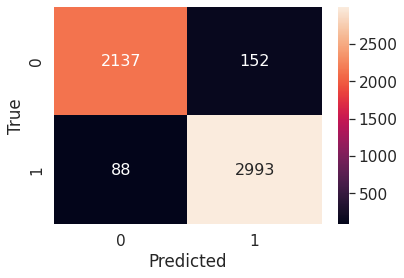

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
matrix_lg = confusion_matrix(y_test_lg, y_pred1)
sn.set(font_scale=1.4) 
sn.heatmap(matrix_lg, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')  
plt.show()

In [ ]:
f1_model1 = f1_score(y_test_lg, y_pred1,average='macro')


In [ ]:
def Out_CSV(Module,File_CSV): # mô hình,file csv cần xuất: Hàm xuất đúng  chỉ cần đổi tên file trong đg dẫn và phép so sánh => file CSV sai
  writer = csv.writer(open("/content/drive/MyDrive/DoAnMayHoc/file_out_LG.csv", 'w'))
  writer.writerow(["Full_Names","Gender_Predicted","Gender_True"])
  i=0
  for x in Module:
    if (x != File_CSV.Gender[i]):
      writer.writerow([File_CSV.Full_Names[i],x,File_CSV.Gender[i]])
      
    i+=1

In [ ]:
Out_CSV(y_pred1,File_Test)

In [ ]:
def gender_trans_model1(name):
    Name = [name]
    vector = cv.transform(Name).toarray()
    if model1.predict(vector) == 1:
        print("Giới Tính: Nam")
    else:
        print("Giới Tính: Nữ")

In [ ]:
gender_trans_model1("Nguyễn Minh Châu")

Giới Tính: Nam


# Mô hình KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
X_train_KNN = cv.fit_transform(File_Train.Mid_Name,File_Train.Last_Name)
y_train_KNN = File_Train.Gender
X_test_KNN = cv.transform(File_Test.Full_Names)
y_test_KNN = File_Test.Gender

In [ ]:
# hiển thị một số thông tin về dữ liệu 
print("Dữ liệu training = ", X_train_KNN.shape, y_train_KNN.shape)
print("Dữ liệu testing = ", X_test_KNN.shape, y_test_KNN.shape)

Dữ liệu training =  (18795, 523) (18795,)
Dữ liệu testing =  (5370, 762) (5370,)


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)

KNN.fit(X_train_KNN, y_train_KNN)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Pre_KNN= KNN.predict(X_test_KNN)

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: " + str(accuracy_score(y_test_KNN, Pre_KNN)))
print("Precision: " + str(precision_score(y_test_KNN, Pre_KNN)))
print("Recall: " + str(recall_score(y_test_KNN, Pre_KNN)))
print("F1-micro: " + str(f1_score(y_test_KNN, Pre_KNN)))
print("F1-macro: " + str(f1_score(y_test_KNN, Pre_KNN, average='macro')))
cf = confusion_matrix(y_test_KNN, Pre_KNN)

Accuracy: 0.862756052141527
Precision: 0.8906666666666667
Recall: 0.8672508925673482
F1-micro: 0.8788028284821575
F1-macro: 0.8603071880122743


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_KNN, Pre_KNN)) 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      2289
           1       0.89      0.87      0.88      3081

    accuracy                           0.86      5370
   macro avg       0.86      0.86      0.86      5370
weighted avg       0.86      0.86      0.86      5370



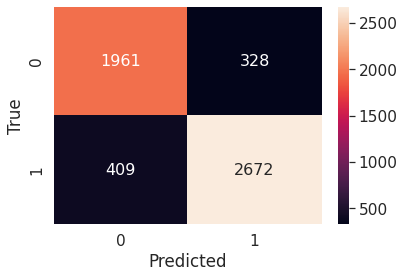

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

matrix_knn = confusion_matrix(y_test_KNN, Pre_KNN)
sn.set(font_scale=1.4) 
sn.heatmap(matrix_knn, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
y_pred = KNN.predict(X_test_KNN)
f1_knn = f1_score(y_test_KNN, y_pred,average='macro')
print(f1_knn)

0.9134023115631205


In [ ]:
def gender_trans_knn(name):
    Name = [name]
    vector = cv.transform(Name).toarray()
    if KNN.predict(vector) == 1:
        print("Giới Tính:Nam")
    else:
        print("Giới Tính:Nữ")

In [ ]:
gender_trans_knn("Tú Anh")

Giới Tính:Nữ


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import time 

start_time = time.time()

dtc = DecisionTreeClassifier(random_state=0,max_depth=65)
dtc.fit(X_train_SVM,y_train_SVM)

print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 0.23913073539733887 để huấn luyện mô hình ----


In [ ]:
predictions_DT = dtc.predict(X_test_SVM)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_DT , y_test_SVM)*100)

SVM Accuracy Score ->  93.7243947858473
